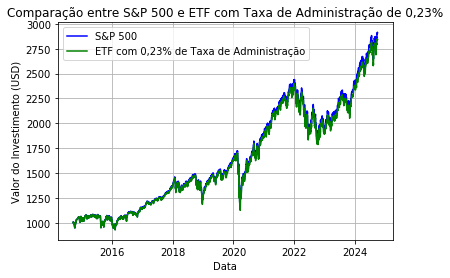

In [2]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np

# Baixar dados históricos do S&P 500
sp500 = yf.Ticker("^GSPC")
data = sp500.history(period="10y")['Close']  # Pegar os últimos 5 anos

# Simulação do ETF com taxa de administração
initial_investment = 1000
annual_fee = 0.0023  # 0,23% ao ano
daily_fee = (1 + annual_fee) ** (1/252) - 1  # 252 dias úteis no ano

# Calculando o valor do ETF ao longo do tempo
etf_values = [initial_investment]
for i in range(1, len(data)):
    # Valor do ETF sem considerar a taxa de administração
    value_without_fee = etf_values[-1] * (data[i] / data[i-1])
    # Aplicando a taxa de administração diária
    value_with_fee = value_without_fee * (1 - daily_fee)
    etf_values.append(value_with_fee)

# Plotar os gráficos
# plt.figure(figsize=(14, 7))

# Gráfico do S&P 500 e do ETF simulado
plt.plot(data.index, data / data.iloc[0] * initial_investment, label="S&P 500", color='blue')
plt.plot(data.index, etf_values, label="ETF com 0,23% de Taxa de Administração", color='green')

plt.title("Comparação entre S&P 500 e ETF com Taxa de Administração de 0,23%")
plt.xlabel("Data")
plt.ylabel("Valor do Investimento (USD)")
plt.grid(True)
plt.legend()
# plt.tight_layout()
# plt.savefig('ets_comparison.png')
plt.show()
